In [2]:
#data processing 
import pandas as pd 
import seaborn as sns
#special visulaization
import missingno as msno
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import requests
import imageio
from io import BytesIO
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import os
os.environ["PROJ_LIB"] = r"C:\Users\16303\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share"
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
fields=[ 'class_of_admission','country_of_citizenship','employer_state','job_info_work_city','job_info_work_state','pw_soc_title','us_economic_sector','case_received_date','employer_city']
data=pd.read_csv('us_perm_visas.csv',usecols=fields)
location=pd.read_csv('lat.csv')
#df= data[['class_of_admission','country_of_citizenship','employer_state','job_info_work_city','pw_soc_title','us_economic_sector','case_received_date']].copy()

In [4]:
data.head()

,case_received_date,class_of_admission,country_of_citizenship,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_title,us_economic_sector
0,NaN,J-1,ARMENIA,NEW YORK,NY,New York,NY,"Computer Software Engineers, Applications",IT
1,NaN,B-2,POLAND,CARLSTADT,NY,New York,NY,Hazardous Materials Removal Workers,Other Economic Sector
2,NaN,H-1B,INDIA,GLEN ALLEN,VA,Lutherville,MD,Civil Engineers,Aerospace
3,NaN,B-2,SOUTH KOREA,FLUSHING,NY,Flushing,NY,File Clerks,Other Economic Sector
4,NaN,L-1,CANADA,ALBANY,NY,Albany,NY,Sales Engineers,Advanced Mfg


In [5]:
data.shape

(374362, 9)

In [6]:
data.isnull().sum()

case_received_date        135271
class_of_admission         22845
country_of_citizenship        59
employer_city                 14
employer_state                42
job_info_work_city           102
job_info_work_state          103
pw_soc_title                2336
us_economic_sector        245294
dtype: int64

In [7]:
data.describe()

,case_received_date,class_of_admission,country_of_citizenship,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_title,us_economic_sector
count,239091,351517,374303,374348,374320,374260,374259,372026,129068
unique,2180,57,202,8384,113,9429,113,905,17
top,6/30/2014,H-1B,INDIA,NEW YORK,CALIFORNIA,New York,CALIFORNIA,"Software Developers, Applications",IT
freq,767,283018,205158,16730,51127,16971,47699,114841,52617


In [8]:
data.columns

Index(['case_received_date', 'class_of_admission', 'country_of_citizenship',
       'employer_city', 'employer_state', 'job_info_work_city',
       'job_info_work_state', 'pw_soc_title', 'us_economic_sector'],
      dtype='object')

## Groupping data based on country of citzenship

In [9]:
#df=data.groupby('country_of_citizenship')['employer_city'].count()
#df=data.groupby('country_of_citizenship')
data.columns = ['case_received_date', 'class_of_admission', 'birth_country',
       'city', 'state_name', 'work_city',
       'work_state', 'pw_soc_title', 'us_economic_sector']
data.loc[data['state_name'] =="Alabama" ,'state_name'] = "AL"
df=data.groupby('birth_country')

In [10]:
df.first()

,case_received_date,class_of_admission,city,state_name,work_city,work_state,pw_soc_title,us_economic_sector
birth_country,,,,,,,,
AFGHANISTAN,12/3/2013,Not in USA,ONTARIO,CA,Ontario,CA,Executive Secretaries and Administrative Assis...,Automotive
ALBANIA,8/15/2012,B-2,NEW YORK,NY,NEW YORK,NY,Financial Analysts,Finance
ALGERIA,5/9/2014,L-1,HOUSTON,TEXAS,Houston,TEXAS,"Geoscientists, Except Hydrologists and Geograp...",Geospatial
ANDORRA,5/1/2015,H-1B,New York,NY,New York,NY,Computer Systems Analysts,NaN
ANGOLA,4/8/2013,H-1B,MEDLEY,FL,Medley,FL,"Electronics Engineers, Except Computer",Other Economic Sector
ANTIGUA AND BARBUDA,8/6/2014,H-1B,WARREN,MICHIGAN,St. Clair Shores,MICHIGAN,Family and General Practitioners,Health Care
ARGENTINA,10/6/2014,H-1B,NORTH JUPITER,FL,NORTH JUPITER,FL,General and Operations Managers,Other Economic Sector
ARMENIA,7/9/2013,J-1,NEW YORK,NY,New York,NY,"Computer Software Engineers, Applications",IT
ARUBA,NaN,NaN,WASHINGTON,DISTRICT OF COLUMBIA,Washington,DISTRICT OF COLUMBIA,NaN,NaN


EDA lat long

In [11]:
location.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [12]:
location1=location[['city','state_name','lat','lng']].copy()

In [13]:
location1.head()

,city,state_name,lat,lng
0,South Creek,Washington,46.9994,-122.3921
1,Roslyn,Washington,47.2507,-121.0989
2,Sprague,Washington,47.3048,-117.9713
3,Gig Harbor,Washington,47.3352,-122.5968
4,Lake Cassidy,Washington,48.0639,-122.0920


In [14]:
#merged_inner = pd.merge(left=data,right=location1, left_on='city', right_on='city',left_on='state_name',right_on='state_id')
data['state_name']=data['state_name'].str.lower();
location1['state_name']=location1['state_name'].str.lower();
data['city']=data['city'].str.lower();
location1['city']=location1['city'].str.lower();
final_dataset = pd.merge(data, location1,  how='inner', left_on=['city','state_name'], right_on = ['city','state_name'])

In [15]:
final_dataset.head()
# test=data.groupby('birth_country')
# test.head()

,case_received_date,class_of_admission,birth_country,city,state_name,work_city,work_state,pw_soc_title,us_economic_sector,lat,lng
0,NaN,NaN,BRAZIL,atlanta,georgia,ATLANTA,GEORGIA,First-Line Supervisors/Managers of Production ...,Construction,33.7627,-84.4225
1,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,Computer Systems Analysts,Other Economic Sector,33.7627,-84.4225
2,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,Computer and Information Systems Managers,Other Economic Sector,33.7627,-84.4225
3,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,"Software Developers, Applications",Other Economic Sector,33.7627,-84.4225
4,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,Computer Systems Analysts,Other Economic Sector,33.7627,-84.4225


In [16]:
final_dataset.head()

,case_received_date,class_of_admission,birth_country,city,state_name,work_city,work_state,pw_soc_title,us_economic_sector,lat,lng
0,NaN,NaN,BRAZIL,atlanta,georgia,ATLANTA,GEORGIA,First-Line Supervisors/Managers of Production ...,Construction,33.7627,-84.4225
1,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,Computer Systems Analysts,Other Economic Sector,33.7627,-84.4225
2,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,Computer and Information Systems Managers,Other Economic Sector,33.7627,-84.4225
3,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,"Software Developers, Applications",Other Economic Sector,33.7627,-84.4225
4,NaN,H-1B,INDIA,atlanta,georgia,Alpharetta,GEORGIA,Computer Systems Analysts,Other Economic Sector,33.7627,-84.4225


In [17]:
final_dataset.isnull().sum()

case_received_date    102473
class_of_admission      9884
birth_country             27
city                       0
state_name                 0
work_city                 39
work_state                39
pw_soc_title            1799
us_economic_sector     84785
lat                        0
lng                        0
dtype: int64

In [18]:
def making_lines (startlat,startlon,arrlat,arrlon):
# Add a connection between new york and London
# startlat = 25.7839; startlon = -80.2102
# arrlat = 22.3511148; arrlon = 78.6677428
# arrlat1 = 35.8617; arrlon1 = 104.1954
# startlat1 = 35.6924; startlon1 = -100.6416
# startlat2 = 33.3951; startlon2 = -110.8722
# startlat3 = 33.3951; startlon3 = -110.8722
# m.drawgreatcircle(startlon3,startlat3,arrlon1,arrlat1, linewidth=0.5, color='#CCFF00')
# m.drawgreatcircle(startlon2,startlat2,arrlon,arrlat, linewidth=0.5, color='#CCFF00')
# m.drawgreatcircle(startlon1,startlat1,arrlon,arrlat, linewidth=0.5, color='#CCFF00')
    m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=0.01, color='#0A26B2')

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
182248    None
182249    None
182250    None
182251    None
182252    None
182253    None
182254    None
182255    None
182256    None
182257    None
182258    None
182259    None
182260    None
182261    None
182262    None
182263    None
182264    None
182265    None
182266    None
182267    None
182268    None
182269    None
182270    None
182271    None
182272    None
182273    None
182274    None
182275    None
182276    None
182277    None
Length: 182278, dtype: object

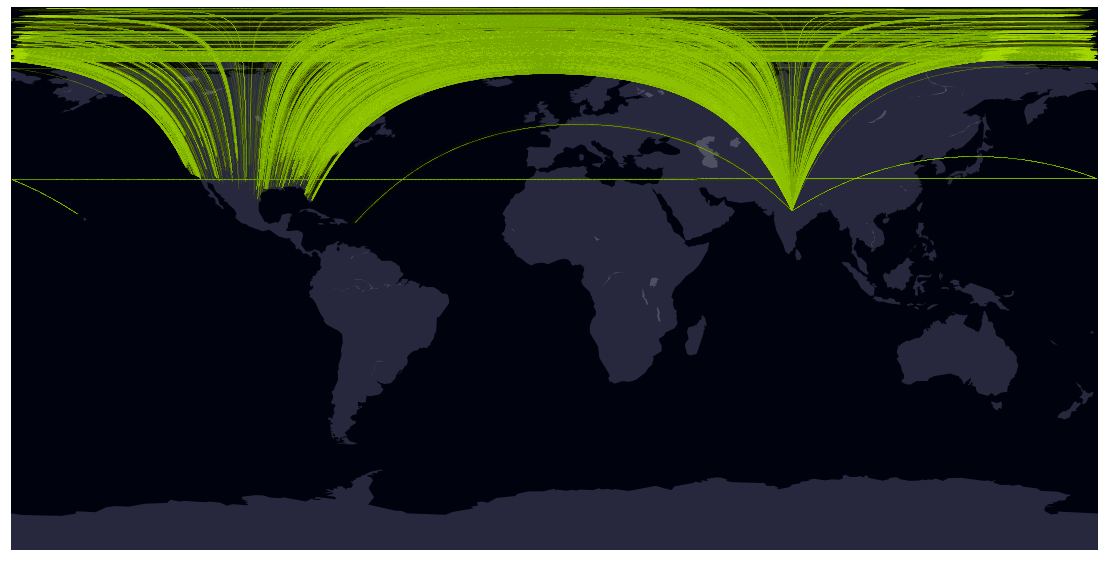

In [29]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(50, 10), edgecolor='w')
m=Basemap(projection='cyl',llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m.drawmapboundary(fill_color='#00020D', linewidth=0)
m.fillcontinents(color='#C4C5FF', alpha=0.2, lake_color='#F2F1F5')
#m.drawcoastlines(linewidth=0.1, color="white")
#m.drawcountries(color='0.7')
startlat = 25.7839; startlon = -80.2102
arrlat = 22.3511148; arrlon = 78.6677428
arrlat1 = 35.8617; arrlon1 = 104.1954
startlat1 = 35.6924; startlon1 = -100.6416
startlat2 = 33.3951; startlon2 = -110.8722
startlat3 = 33.3951; startlon3 = -110.8722
# m.drawgreatcircle(startlon3,startlat3,arrlon1,arrlat1, linewidth=0.5, color='#0A26B2')
# m.drawgreatcircle(startlon2,startlat2,arrlon,arrlat, linewidth=0.5, color='#0A26B2')
# m.drawgreatcircle(startlon1,startlat1,arrlon,arrlat, linewidth=0.5, color='#0A26B2')
# m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=0.01, color='#0A26B2')
final_dataset.apply(lambda x: making_lines(x['lat'],x['lng'], 22.3511148,78.6677428),axis=1)

In [ ]:
df.apply(do_irreversible_thing, axis=1)